# Homework 05
## Ekrem Yiğiter 59721
### December 07, 2020

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
def safelog2(x):
    if x == 0:
        return (0)
    else:
        return (np.log2(x))

## Importing Data

In [12]:
# read data into memory
data_set = np.genfromtxt("hw04_data_set.csv", delimiter = ",")

# get x and y values
x_train = data_set[1:101,0]
y_train = data_set[1:101,1].astype(int)
x_test = data_set[101:134,0]
y_test = data_set[101:134,1].astype(int)

# get number of samples
K = np.max(y_train)
N_train = x_train.shape[0]
N_test = x_test.shape[0]

## Initialization

In [ ]:
# create necessary data structures
node_indices = {}
is_terminal = {}
need_split = {}

node_mean = {}
node_splits = {}

# put all training instances into the root node
node_indices[1] = np.array(range(N_train))
is_terminal[1] = False
need_split[1] = True

## Tree Inference

In [26]:
#5 to 50 iterations (question 5)
P_values = range(5,51,5)
for i in P_values:
    
    
    # create necessary data structures
    node_indices = {}
    is_terminal = {}
    need_split = {}

    node_mean = {}
    node_splits = {}
    
    # put all training instances into the root node
    node_indices[1] = np.array(range(N_train))
    is_terminal[1] = False
    need_split[1] = True

    # learning algorithm
    while True:
        
        # find nodes that need splitting
        split_nodes = [key for key, value in need_split.items() if value == True]
        
        # check whether we reach all terminal nodes
        if len(split_nodes) == 0:
            break
        
        # find best split positions for all nodes
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
            node_mean[split_node] = np.mean(y_train[data_indices])
        
            if len(np.unique(y_train[data_indices])) <= p:
                is_terminal[split_node] = True
            else:
                is_terminal[split_node] = False

                best_scores = 0.0
                best_splits = 0.0
                
                unique_values = np.sort(np.unique(X_train[data_indices]))
                split_positions = (unique_values[1:len(unique_values)] + unique_values[0:(len(unique_values) - 1)]) / 2
                split_scores = np.repeat(0.0, len(split_positions))
                for s in range(len(split_positions)):
                    left_indices = data_indices[X_train[data_indices] < split_positions[s]]
                    right_indices = data_indices[X_train[data_indices] >= split_positions[s]]
                    split_scores[s] = -len(left_indices) / len(data_indices) * np.sum([np.mean(y_train[left_indices] == c + 1) * safelog2(np.mean(y_train[left_indices] == c + 1)) for c in range(K)]) - len(right_indices) / len(data_indices) * np.sum([np.mean(y_train[right_indices] == c + 1) * safelog2(np.mean(y_train[right_indices] == c + 1)) for c in range(K)])
                    
                best_scores = np.min(split_scores)
                best_splits = split_positions[np.argmin(split_scores)]
                # decide where to split on which feature

                node_splits[split_node] = best_splits
            
                # create left node using the selected split
                left_indices = data_indices[X_train[data_indices] <= best_splits
                node_indices[2 * split_node] = left_indices
                is_terminal[2 * split_node] = False
                need_split[2 * split_node] = True
      
                # create right node using the selected split
                right_indices = data_indices[X_train[data_indices] > best_splits
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1] = True
    y_predicted = np.repeat(0.0, N_test)
                                             
    

SyntaxError: invalid syntax (<ipython-input-26-4049f86ee4af>, line 59)

## Regressogram

$$\widehat{p}(x) = \dfrac{\#\{x_{i} \textrm{ is in the same bin as } x\}}{Nh}$$

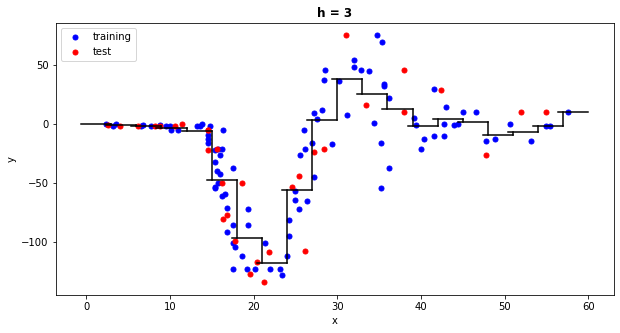

In [5]:
bin_width = 3
left_borders = np.arange(minimum_value, maximum_value - bin_width, bin_width)
right_borders = np.arange(0 + bin_width, maximum_value, bin_width)
p_hat_reg = np.asarray([np.sum(((left_borders[i] < x_train) & (x_train <= right_borders[i])) * y_train)\
/np.sum((left_borders[i] < x_train) & (x_train <= right_borders[i])) for i in range(len(left_borders))])

plt.figure(figsize = (10, 5))
plt.plot(x_train, y_train, "b.", markersize = 10, label = 'training')
plt.plot(x_test, y_test, "r.", markersize = 10, label = 'test')
plt.legend(loc='upper left')
plt.title('h = 3', fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat_reg[b], p_hat_reg[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat_reg[b], p_hat_reg[b +1]], "k-")    
plt.show()

## Rule Extraction

In [ ]:
# extract rules
terminal_nodes = [key for key, value in is_terminal.items() if value == True]
for terminal_node in terminal_nodes:
    index = terminal_node
    rules = np.array([])
    while index > 1:
        parent = np.floor(index / 2)
        if index % 2 == 0:
            # if node is left child of its parent
            rules = np.append(rules, "x{:d} < {:.2f}".format(node_features[parent] + 1, node_splits[parent]))
        else:
            # if node is right child of its parent
            rules = np.append(rules, "x{:d} >= {:.2f}".format(node_features[parent] + 1, node_splits[parent]))
        index = parent
    rules = np.flip(rules)
    print("{} => {}".format(rules, node_frequencies[terminal_node]))

## RMSE for Regressogram

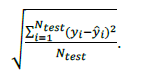

In [16]:
reg_pred = np.zeros(20)
for i in range(20):
    reg_pred[i] = y_test[i] - p_hat_reg[i]
rmse_reg = np.sqrt(np.sum((reg_pred)**2)/33)

print('Regressogram => RMSE is ' + str(rmse_reg) + '  when h is 3')

Regressogram => RMSE is 36.611035534888266  when h is 3
